# Task 4 : Exploratory Data Analysis - Terrorism


# Name : Divyansh Kogta

<br>

## Problem Statement

* <b>Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’. </b>

* <b>As a security/defense analyst, try to find out the hot zone of terrorism. </b>

* <b>Derive all security issues and insights by performing EDA. </b>


In [33]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# Importing dataset
df = pd.read_csv('globalterrorism.csv', encoding="ISO-8859-1", low_memory = False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [35]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [36]:
# shape
df.shape

(181691, 135)

In [37]:
# description
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# all column names
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [39]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':
                  'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                  'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                   'targtype1_txt':'Target_Type','weaptype1_txt':'Weapon_type','motive':'Motive',
                  'extended':'Extended','latitude':'Latitude','longitude':'Longitude', 'target1': 'Target','city':'City'}, inplace = True)

In [40]:
df.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [41]:
# Check if there is any missing values
df.isnull().sum()

eventid            0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [42]:
print('Total no. of null values = ', df.isnull().sum().sum())

Total no. of null values =  13853997


In [43]:
# Taking only necessary columns in data frame
df = df[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude',
                 'AttackType','Killed','Wounded','Group','Target_Type','Weapon_type']]
df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Group,Target_Type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,Unknown,Government (Diplomatic),Incendiary


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Group        181691 non-null  object 
 13  Target_Type  181691 non-null  object 
 14  Weapon_type  181691 non-null  object 
dtypes: float64(4), int64(3), object(8)
memory usage: 20.8+ MB


In [45]:
# Check if there is any missing values
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
Latitude        4556
Longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Group              0
Target_Type        0
Weapon_type        0
dtype: int64

In [46]:
print('Total no. of null values = ', df.isnull().sum().sum())

Total no. of null values =  36592


In [47]:
# Replacing NaN value in Wounded and Killed column by 0
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)

In [48]:
df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
State           421
Region            0
City            434
Latitude       4556
Longitude      4557
AttackType        0
Killed            0
Wounded           0
Group             0
Target_Type       0
Weapon_type       0
dtype: int64

In [49]:
# Cleaned data
df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Group,Target_Type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,Unknown,Government (Diplomatic),Incendiary


In [51]:
# Coorelation
df.corr()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.021252,0.017484
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.004031,0.003178
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003225,-0.001082
Latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.013170,0.015921
Longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000587,0.000205
Killed,0.021252,0.004031,-0.003225,-0.013170,-0.000587,1.000000,0.443326
Wounded,0.017484,0.003178,-0.001082,0.015921,0.000205,0.443326,1.000000


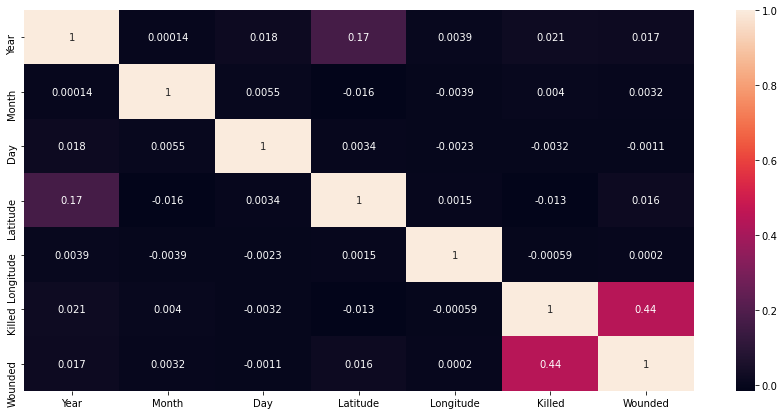

In [52]:
# Heatmap to check collinearity
import seaborn as sns

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot= True)
plt.show()

## EDA

In [50]:
# Number of unique values in each column
df.nunique()

Year              47
Month             13
Day               32
Country          205
State           2855
Region            12
City           36674
Latitude       48322
Longitude      48039
AttackType         9
Killed           205
Wounded          237
Group           3537
Target_Type       22
Weapon_type       12
dtype: int64

### Attack vs Location

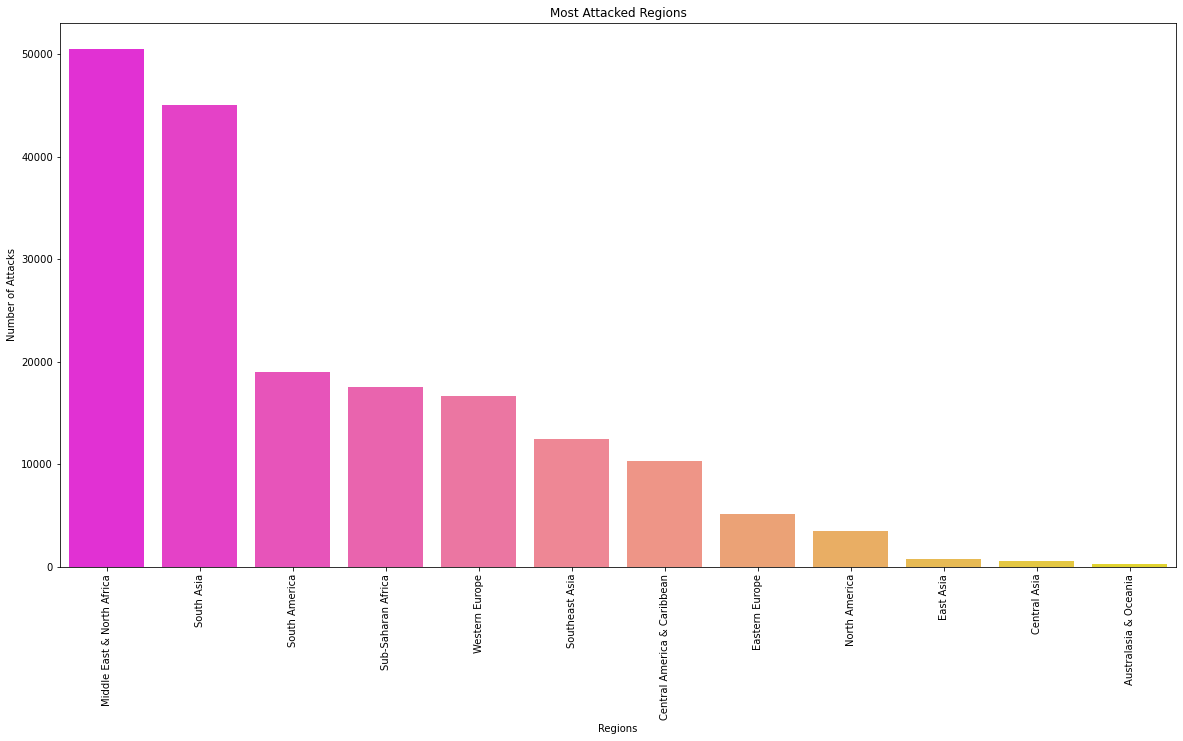

In [66]:
# Regions with most attacks
plt.figure(figsize = (20,10))
sns.barplot(x=df['Region'].value_counts().index, y=df['Region'].value_counts().values, palette='spring')
plt.title('Most Attacked Regions')
plt.xlabel('Regions')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

<b> Middle East & North Africa is the most affected terrorist target region </b>

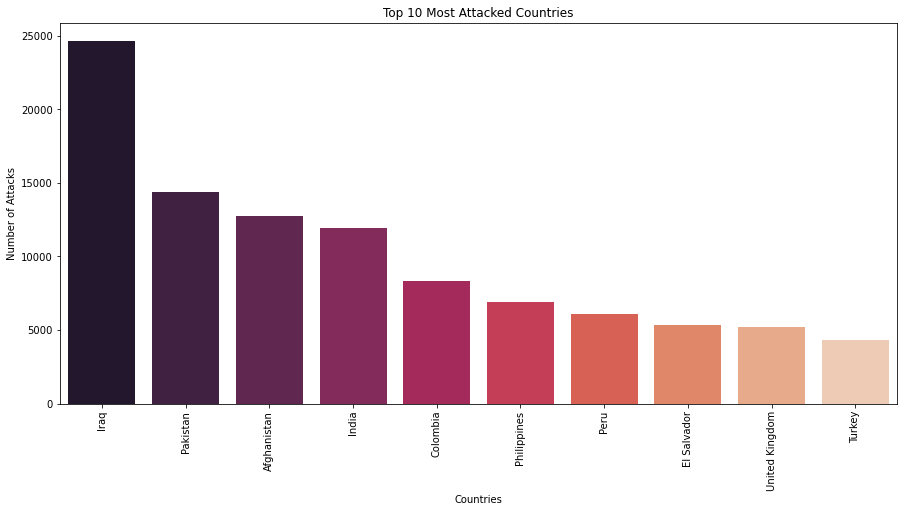

In [76]:
# Countries with most attacks
plt.figure(figsize = (15,7))
sns.barplot(x=df['Country'].value_counts()[:10].index, y=df['Country'].value_counts()[:10].values, palette='rocket')
plt.title('Top 10 Most Attacked Countries')
plt.xlabel('Countries')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

<b>Iraq is the most attacked country</b>

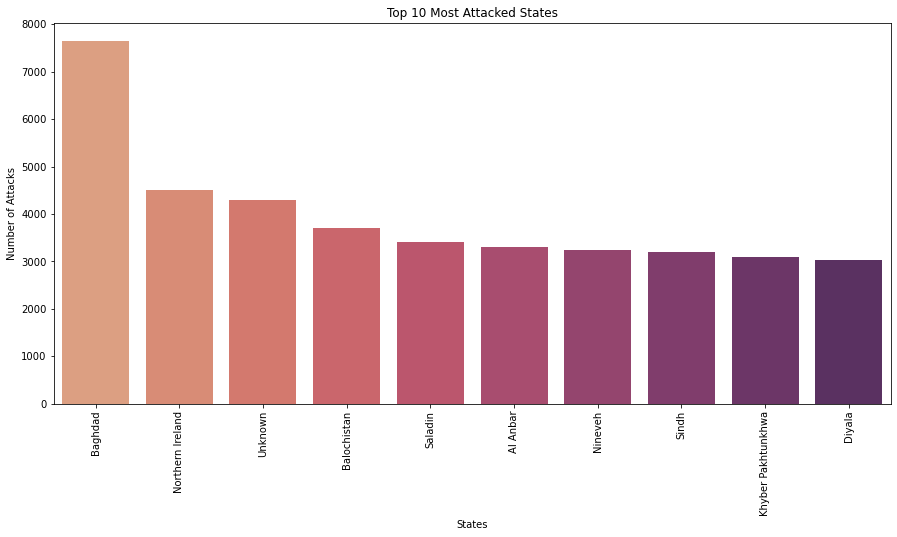

In [77]:
# States with most attacks
plt.figure(figsize = (15,7))
sns.barplot(x=df['State'].value_counts()[:10].index, y=df['State'].value_counts()[:10].values, palette='flare')
plt.title('Top 10 Most Attacked States')
plt.xlabel('States')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

<b>Baghdad is the most attacked state</b>

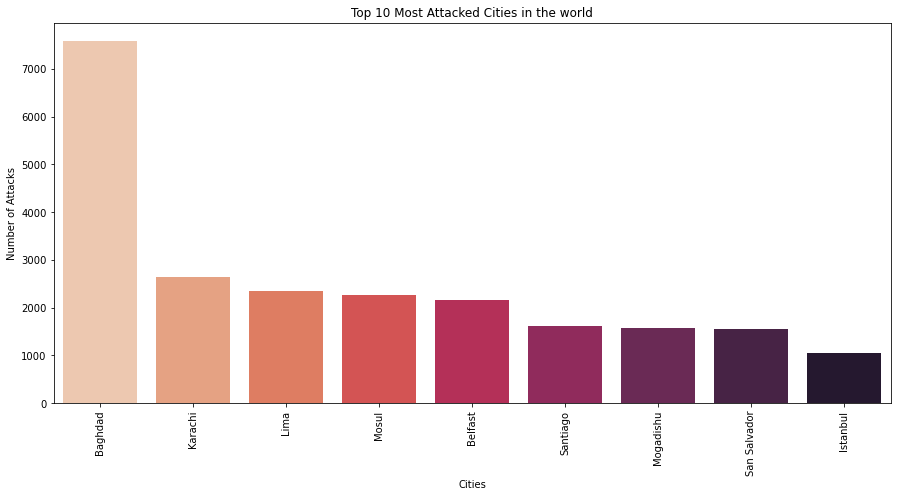

In [80]:
# Cities with most attacks
plt.figure(figsize = (15,7))
sns.barplot(x=df['City'].value_counts()[1:10].index, y=df['City'].value_counts()[1:10].values, palette='rocket_r')
plt.title('Top 10 Most Attacked Cities in the world')
plt.xlabel('Cities')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
#plt.grid()
plt.show()

<b>Baghdad is the most attacked city</b>

### Attack vs Target Type

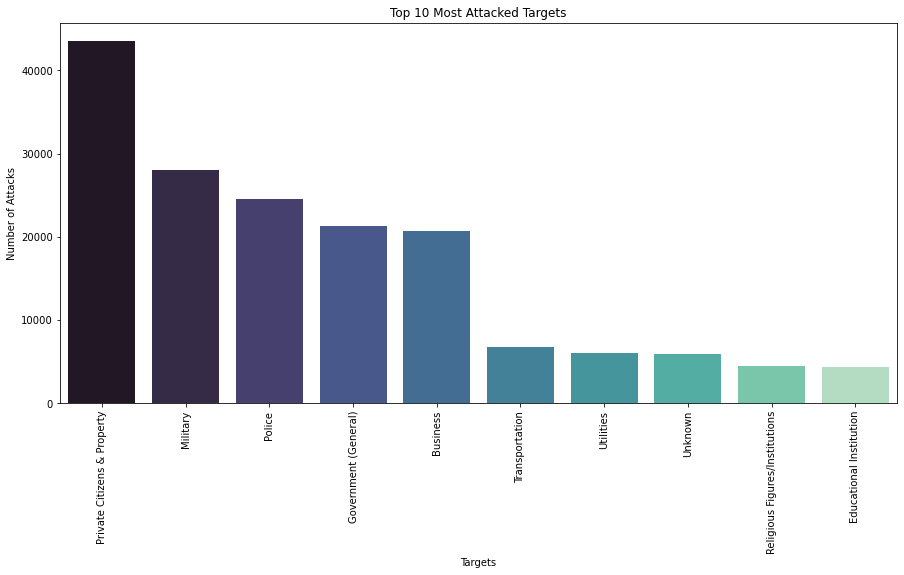

In [65]:
# Most attacked Targets
plt.figure(figsize = (15,7))
sns.barplot(x=df['Target_Type'].value_counts().head(10).index, y=df['Target_Type'].value_counts().head(10).values, palette='mako')
plt.title('Top 10 Most Attacked Targets')
plt.xlabel('Targets')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

<b>Private Citizens and Property are the most terrorist targets</b>

### Various attacking methods

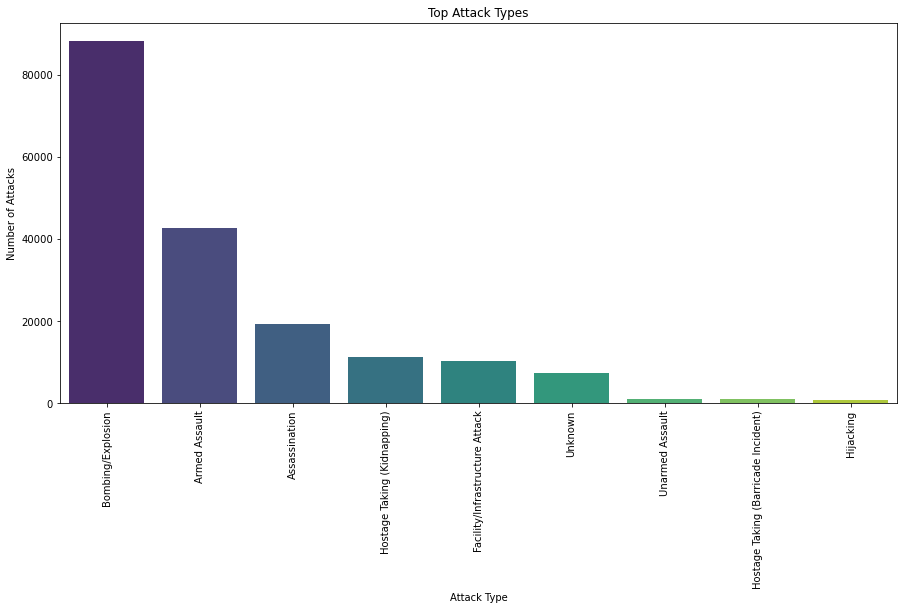

In [69]:
plt.figure(figsize = (15,7))
sns.barplot(x=df['AttackType'].value_counts().index, y=df['AttackType'].value_counts().values, palette='viridis')
plt.title('Top Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

<b>Bombing/Explosion is the most used terror attack type</b>

### Weapons vs Attack

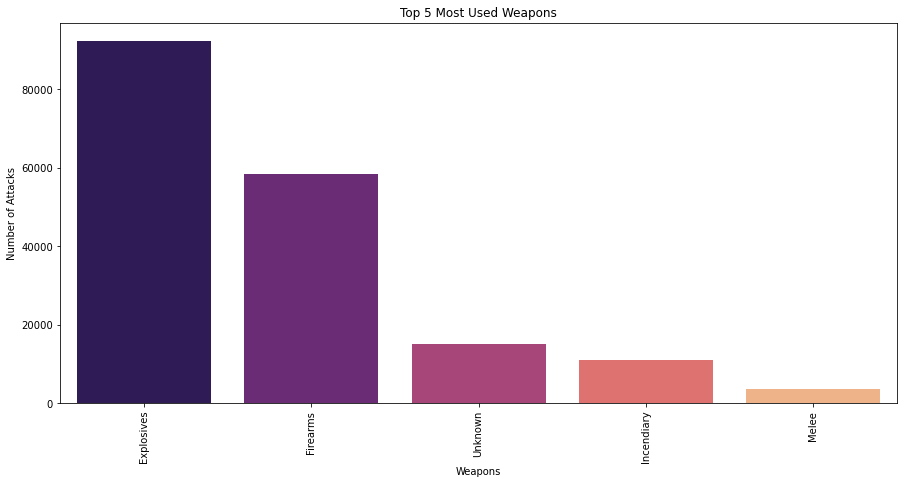

In [74]:
#Top 5 most used weapon types in terror attacks
plt.figure(figsize = (15,7))
sns.barplot(x=df.Weapon_type.value_counts().head(5).index, y=df.Weapon_type.value_counts().head(5).values, 
            palette='magma')
plt.title('Top 5 Most Used Weapons')
plt.xlabel('Weapons')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

### Terrorist attack over the Years

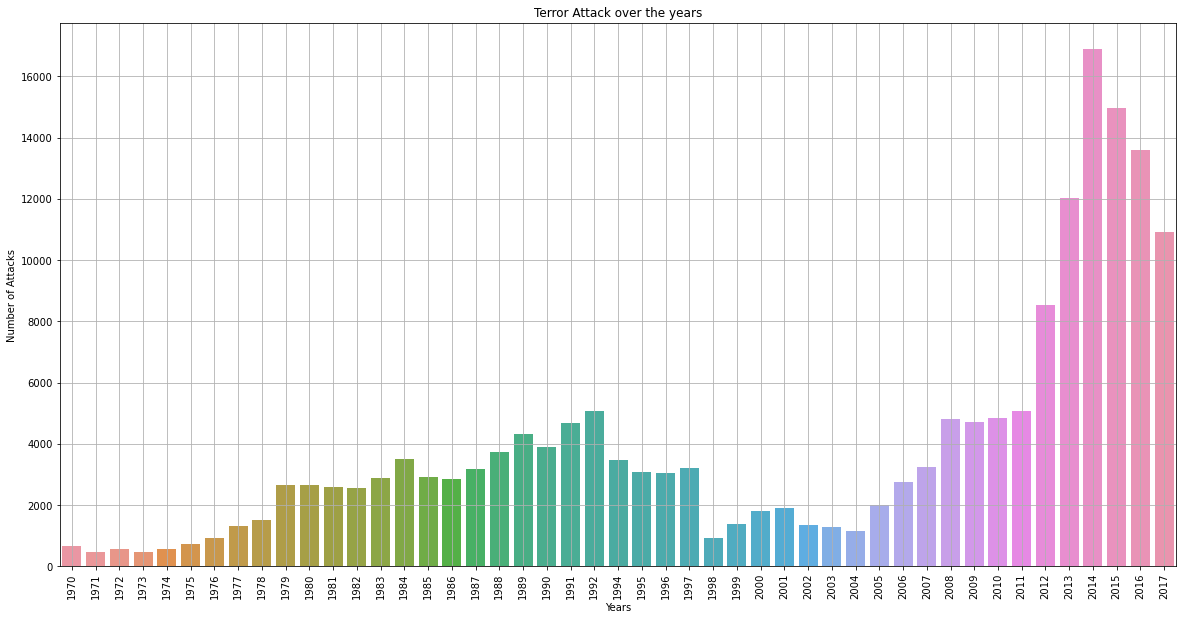

In [90]:
# No. of terrorist attacks wrt year
plt.figure(figsize = (20,10))
sns.barplot(x=df['Year'].value_counts().index, y=df['Year'].value_counts().values)
plt.title('Terror Attack over the years')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.grid()
plt.show()

<b>Year 2014 had the most number of terror attacks approximately 17,000</b>

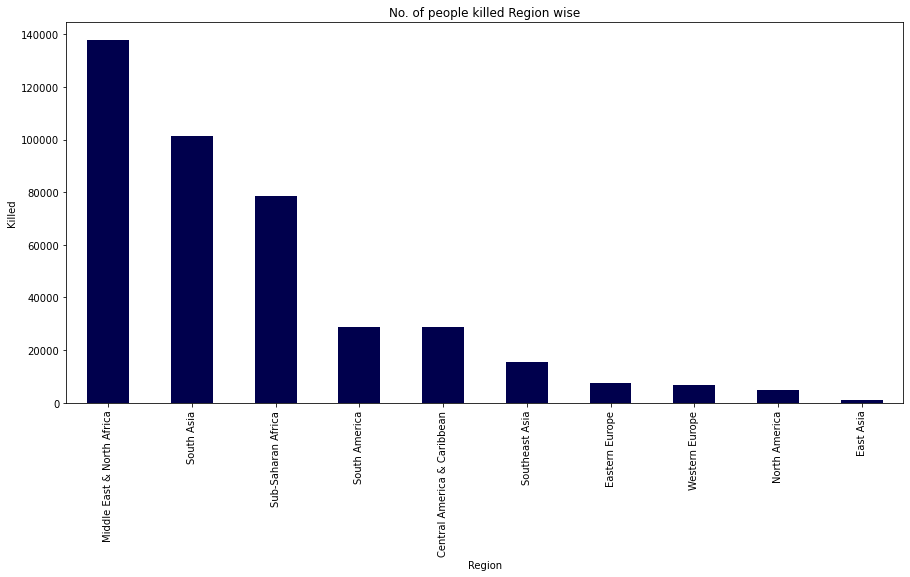

In [108]:
# Killed vs Region
plt.figure(figsize = (15,7))
df.groupby(['Region'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', colormap = 'seismic')
plt.xticks(rotation=90)
plt.title('No. of people killed Region wise')
plt.ylabel("Killed")
plt.show()

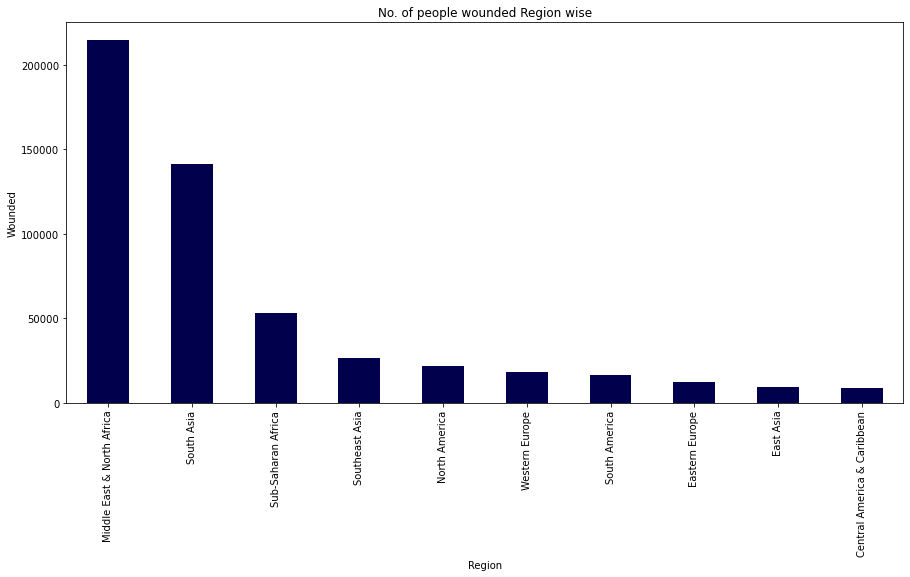

In [109]:
# Wounded vs Region
plt.figure(figsize = (15,7))
df.groupby(['Region'])['Wounded'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', colormap = 'seismic')
plt.xticks(rotation=90)
plt.title('No. of people wounded Region wise')
plt.ylabel("Wounded")
plt.show()

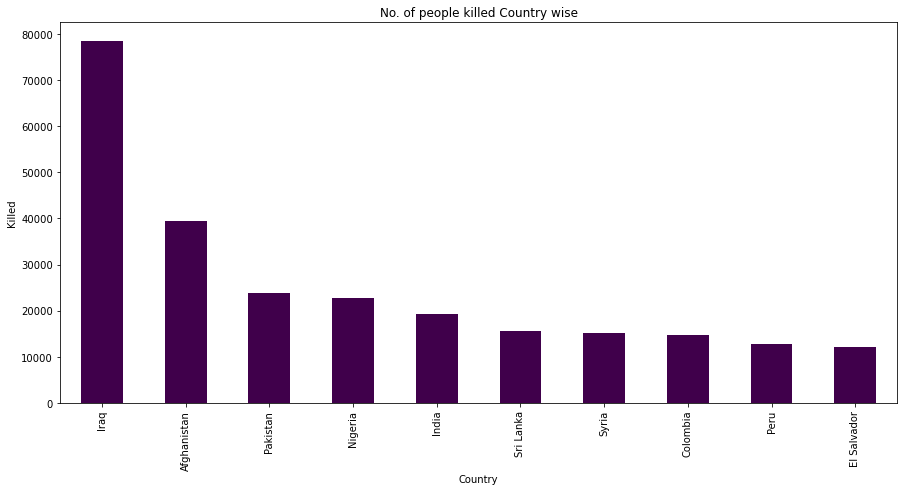

In [110]:
# Killed vs Country
plt.figure(figsize = (15,7))
df.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', colormap = 'PRGn')
plt.xticks(rotation=90)
plt.title('No. of people killed Country wise')
plt.ylabel("Killed")
plt.show()

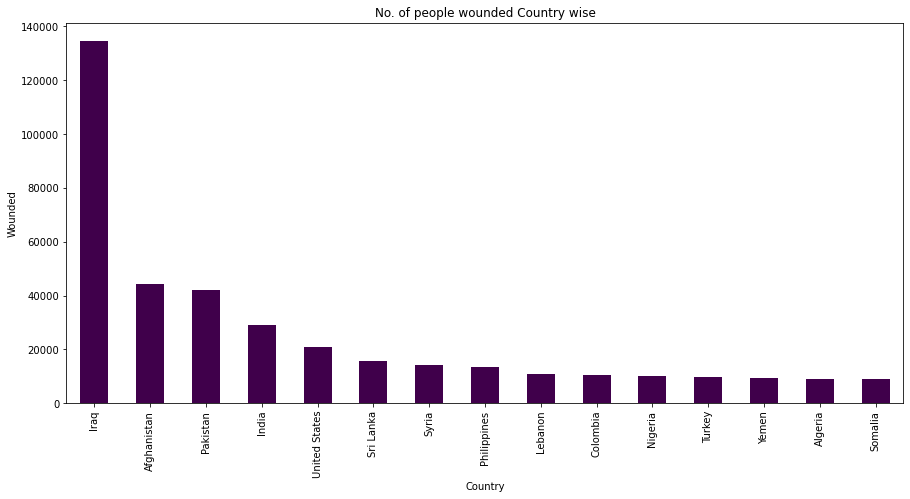

In [111]:
# Wounded vs Country
plt.figure(figsize = (15,7))
df.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(15).plot(kind = 'bar', colormap = 'PRGn')
plt.xticks(rotation=90)
plt.title('No. of people wounded Country wise')
plt.ylabel("Wounded")
plt.show()

### Terror Group vs Attacks

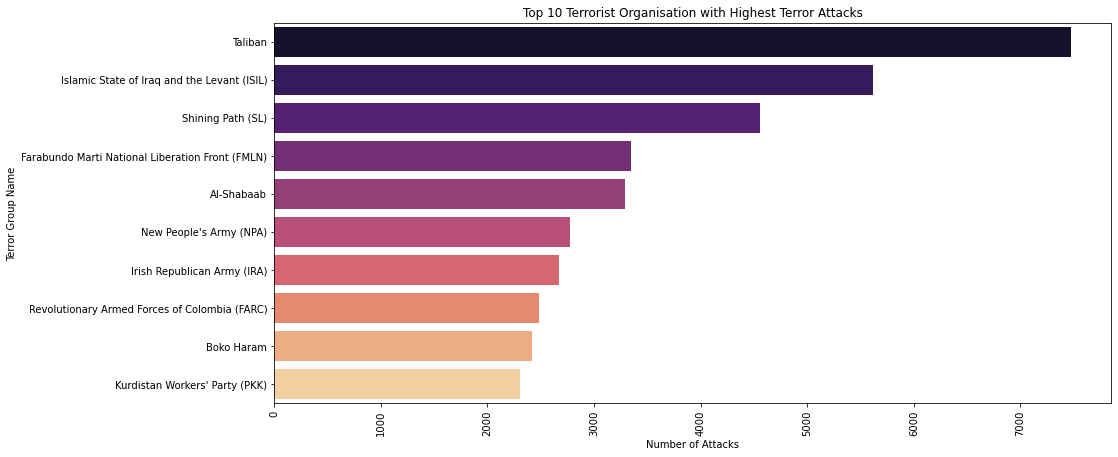

In [123]:
#Terror Groups
plt.figure(figsize = (15,7))
sns.barplot(x = df['Group'].value_counts()[1:11].values, y = df['Group'].value_counts()[1:11].index,palette='magma')
plt.title('Top 10 Terrorist Organisation with Highest Terror Attacks')
plt.ylabel('Terror Group Name')
plt.xlabel('Number of Attacks')
plt.xticks(rotation= 90)
plt.show()

<b>Taliban is responsible for the most number of attacks</b>

# Conclusion 

#### 1. The country which was affected with the most terrorist attacks is Iraq. Most number of people were killed and wounded here.

#### 2. Middle East & North Africa is the most affected terrorist target region. Most number of people were killed and wounded in this region.

#### 3. The State and the City that was most affected by terror attacks is Baghdad.

#### 4. Private Citizens and Property were the most attacked targets.

#### 5. Bombing/Explosion has been the most popular method of terror attack.

#### 6. Explosives have been consistently the most popular weapon choice for terrorist.

#### 7. Year 2014 had the most number of terror attacks in the last decade. Approximately 17000 attacks in one year.

#### 8. Taliban is responsible for the most number of terror attacks.